# Michelson's Interferometer

Matric: 2663452m

## Overview

In this lab we are required to calibrate the Michelson's Interferometer and use it to measure the wavelength of a green laser. Then use it to measure the spectral width of a green laser and a red and white LED. Finally we are required to use the interferometer to measure the refractive index of a perspex block.

## Pre lab questions:

b) If you observe a green laser (λ = 532nm) and move one of the interferometer mirrors by 1µm,
by how many fringes does the observed pattern shift?

$$Path Difference = r_2 - r_1 = 2d\sin\theta = 2m\lambda $$


<br>
For $λ = 532nm$ <br>


<br>
$r_1 = x$ <br>


<br>
$r_2 = x+1µm$ <br>


<br>
$r_2 - r_1 = 21\mu = 2m\lambda$ <br>


<br>
$1\mu m = 2m532nm$ <br>


<br>
$m = \frac{2\mu m}{532nm} = 3.76$ <br>

For 1 mirror to move by 1µm, the pattern shifts by 3.76 fringes.

c) In 2 cells below <br>
d) In 2 cells below <br>
As the second mirror is moved the intensity of the light is reduced as the light is no longer in phase and is desctructively interefering. <br>


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import os
import scipy.optimize as opt
from scipy.signal import find_peaks

title_size = 18
axis_size = 14

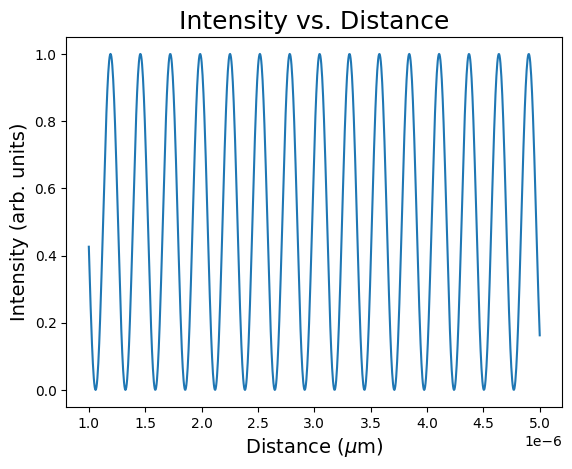

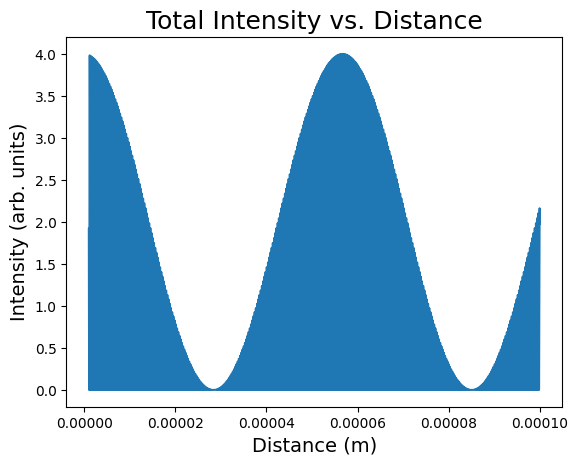

In [3]:

def amplitude(d, lam):
    return (np.sin(2*np.pi*d/(lam)))

def totAmplitude(d, lam1, lam2):
    return (np.abs(amplitude(d, lam1) + amplitude(d, lam2)))**2
def int_from_amp(d, lam):
    return (np.abs(amplitude(d, lam)))**2

lam = 530e-9
lam2 = 535e-9
d= np.linspace(1e-6, 5e-6, 1000)
d2 = np.linspace(1e-6, 100e-6, 100000)

plt.figure()
plt.plot(d, int_from_amp(d, lam))
plt.title('Intensity vs. Distance', fontsize=title_size)
plt.xlabel(r'Distance ($\mu$m)', fontsize=axis_size)
plt.ylabel('Intensity (arb. units)', fontsize=axis_size)
plt.show()

plt.figure()
plt.plot(d2, totAmplitude(d2, lam, lam2))
plt.title('Total Intensity vs. Distance', fontsize=title_size)
plt.xlabel(r'Distance (m)', fontsize=axis_size)
plt.ylabel('Intensity (arb. units)', fontsize=axis_size)
plt.show()

### End of pre lab questions

# Task 5.1.3
In this first task we are requuired to calibrate the interferometer and use it to then measure the wavelength of a green laser. Which was done by counting the number of fringes pass a 
fixed point on the screen and noting how much the mirror has travelled for regular intervals. <br>
Use data to calculate wavelength of light.
uncertainty in the fringes can be approximated to be 0.25 of a fringe this is due to reading uncertainty, and uncertainty in the mirror 
travel is given by the reading uncertainty of an analog scale at $ \pm$ half a division ($ 0.5\mu m$)

In [4]:
fringe = np.array([20,40,60,80])
Mirror2_travel = np.array([6e-6,11e-6,16e-6,21e-6])

def wavelength(fringe, Mirror2_travel):
    return ((2*Mirror2_travel)/(fringe))
err = np.std(wavelength(fringe, Mirror2_travel))
#### put uncertainties in

print(f'The wavelength of the green laser is {np.mean(wavelength(fringe, Mirror2_travel)):1e} ± {err:2e} m')

The wavelength of the green laser is 5.520833e-07 ± 2.909217e-08 m


# Task 5.2.1
As mirror two is moved through its travel the brightness of the fringes changes and the fringes become harder to distinguish from each other, this follows the same idea as seen the the Pre-lab question d. As in this question the graph of the intensity of a laser of multiple wavelengths against the path difference of the interfering waves is plotted and as the distance varies the intensity reaches minima and maxima.  

# Task 5.2.2
This task is to measure the spectral width of the green laser by measuring the total distance travelled by mirror 2 between observing the first contrast minima on either side of the spectrum. And then compare that to the specification supplied by the manufacturer.<br>
<br>
The total range travelled of mirror 2 is 353 $\mu m$ and therefore the distance from the centre of the fringes (0th order maximum) where the intensity is greatest to the first contrast minima is 176.5 $\mu m$.

Below is a graph of the intensity of light against the distance the second mirror is moved. where the first minima occurs at 176.5 $\mu m$.
This distance corresponds to a certain difference in the wavelength of the light emmitted by the laser and this was determined to be 0.3474 nm. From the labscript we are told that the manufacturer of the laser states that the difference in wavelengths emitted for temperatures of around 20-25 degrees celcsius is between 0.3 and 0.5 nm (see figure 15 of the labscipt) which agrees with the determined results.

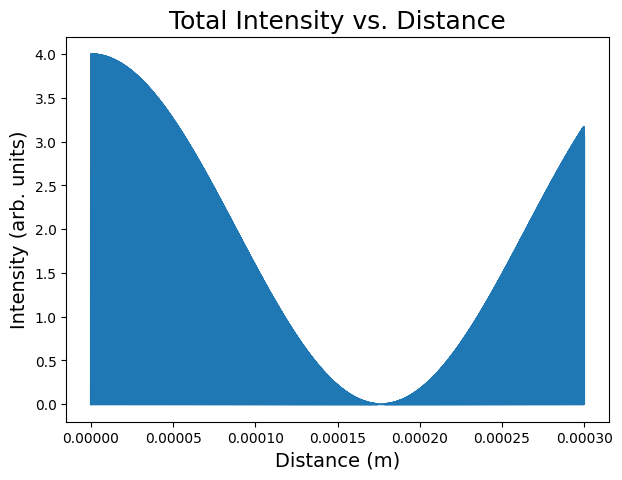

In [5]:

def amplitude(d, lam):
    return (np.sin(2*np.pi*d/(lam)))
def totAmplitude(d, lam1, lam2):
    return (np.abs(amplitude(d, lam1) + amplitude(d, lam2)))**2

lam = 350e-9
lam2 = 350.3474e-9
d= np.linspace(0e-6, 300e-6, 100000)
plt.figure(figsize = (7,5))
plt.plot(d, totAmplitude(d, lam, lam2))
plt.title('Total Intensity vs. Distance', fontsize=title_size)
plt.xlabel(r'Distance (m)', fontsize=axis_size)
plt.ylabel('Intensity (arb. units)', fontsize=axis_size)
plt.show()



# Task 6.1

This task was to repeat the same procedure used in task 5.2.1 but for the red LED. <br>
<br>
For the red LED the total range travelled by mirror 2 is $19\mu m$ and therefore the distance for the centre of the fringes (0th order maximum) where the intensity is greatest to the first contrast minimum is $9.5\mu m$. The difference in the wavelengths $\Delta \lambda$ calculated for a minima seperation of $19 \mu m$ is $4.83 nm$. And in figuree 17 of the labscipt the difference in wavelength expected is $\approx $ 10nm when taking a readiing at Full Width Half Max (FWHM) which some what agrees with the data contanied, however, this method to determine the wavelngths emitted from the LED are not very accurate because for an LED the emitted light is a continuos spectrum of wavelengths and not a couple of discrete wavelengths like the green laser in the Task above.

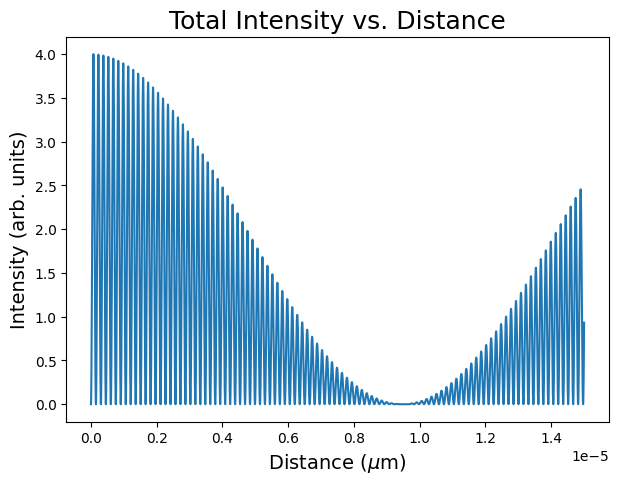

In [6]:

def amplitude(d, lam):
    return (np.sin(2*np.pi*d/(lam)))
def totAmplitude(d, lam1, lam2):
    return (np.abs(amplitude(d, lam1) + amplitude(d, lam2)))**2

lam = 300e-9
lam2 = 304.83e-9
d= np.linspace(0e-6, 15e-6, 1000000)
plt.figure(figsize = (7,5))
plt.plot(d, totAmplitude(d, lam, lam2))
plt.title('Total Intensity vs. Distance', fontsize=title_size)
plt.xlabel(r'Distance ($\mu$m)', fontsize=axis_size)
plt.ylabel('Intensity (arb. units)', fontsize=axis_size)
plt.show()



# Task 7.1

This task required us to examine the appearance of the spectrum produced by a white LED and plot the intensity of three wavelengths of light present in white light as a function of distance travveled by mirror 2. <br>
<br>
The fringes that appeared on the screen when a White LED was mounted in the Michelson Interferometer apparatus were fainter than that of the red LED or green laser. This is most likely due to the fact that the white LED emits light at a range of wavelengths, also because of this the fringes appeared more spread containing a range of visible colours, at different diffraction angles dependent on wavelength.

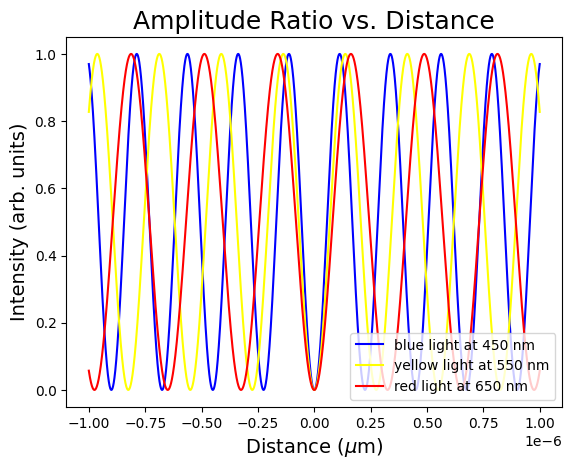

In [11]:
def amplitude(d, lam):
    return (np.sin(2*np.pi*d/(lam)))
def Int(d, lam):
    return (np.abs(amplitude(d, lam)))**2
    
lamb = [450e-9, 550e-9, 650e-9]
d= np.linspace(-1e-6, 1e-6, 100000)

plt.figure()
plt.plot(d, Int(d, lamb[0]),color = 'blue', label = 'blue light at 450 nm')
plt.title('Amplitude Ratio vs. Distance', fontsize=title_size)
plt.xlabel(r'Distance ($\mu$m)', fontsize=axis_size)
plt.ylabel('Intensity (arb. units)', fontsize=axis_size)
plt.plot(d, Int(d, lamb[1]), color = 'yellow', label = 'yellow light at 550 nm')
plt.plot(d, Int(d, lamb[2]), color = 'red', label = 'red light at 650 nm')
plt.legend(loc = 'lower right')

plt.show()

From the graph above plotting the intensity of the different wavelengths of light as approximated for a white LED against the distance tarvelled by mirror two in the experimental apparatus, it is possible to see that for a mirror travel of $ 0\mu m$ the intensity of all three wavelengths was at a minimum but more importantly this is a point where the intensityies for all the different wavelengths are equal. As the mirror is moved in either direction the wavelengths are no longer in phase and the intensity of the overall light is reduced, but seperate bright fringes appear for each wavelengths. this cycle repeats until the first contrast minimum is reached. This result coincides with that expected as outlined above at the start of Task 7.1.

# Task 8

The final task required us to use the Michelson Interferometer to measure the refractive index of a perspex block, and plot the number of fringes passed on a fixed point on the screen against the angle of the perspex block. <br>

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/optimize/_minpack_py.py:881: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


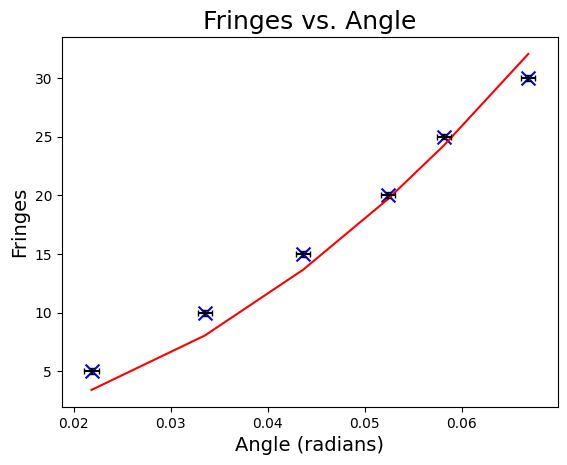

The refractive index of the perspex block is 29.762197 ± 0.040000


In [8]:
angle = [1.25, 1.92,2.5,3,3.33,3.83]
angle_rad = np.radians(angle)
fringes = [5,10,15,20,25,30]
lam = 552e-9
def refractiveIndex(theta , lamb, t , N, n):
    N = ((2*t/lamb) * ((((n**2)-(np.sin(theta))**2)**(1/2))+1-np.cos(theta)-n))
    return N

for i in angle_rad:
    popt,_= opt.curve_fit(refractiveIndex, angle_rad, fringes,p0 = [i,552e-9,8,10])

plt.figure()
plt.plot(angle_rad, refractiveIndex(angle_rad, *popt), color = 'red')
plt.scatter(angle_rad, fringes, s=100,  marker='x', color='blue')
plt.errorbar(angle_rad, fringes, yerr=0.25, xerr=0.00072722, fmt='none', ecolor='black', capsize=2 )
plt.title('Fringes vs. Angle', fontsize=title_size)
plt.xlabel(r'Angle (radians)', fontsize=axis_size)
plt.ylabel('Fringes', fontsize=axis_size)
plt.show()
err = 0.04
print(f'The refractive index of the perspex block is {popt[3]:f} ± {err:f}')

From the graph above it is possible to see that thee number of fringes passed on a fixed point on the screen increases as the angle of the perspex block increases, this increase is also clearly non-linear.<br>
<br>

If the perspex block was twice as thick the fringes on the screen would move further for the same difference in angle of the block. This increase would be linear with the thickness as the number of fringes passed is directly proportional to the thickness as given by the equation:

$$N = \frac{2T}{\lambda}\left(\sqrt{n^2 - \sin(\alpha)^2}+1 - \cos(\alpha)-n\right) $$

Equation 14 from the labscipt. Where $N$ is the number of fringes passed, $T$ is the thickness of the block, $\lambda$ is the wavelength of the light, $n$ is the refractive index of the block and $\alpha$ is the angle of incidence of the light.